### Assignment
In this project you must create a web service that uses machine learning to make pre-dictions based on the data setpowerproductionavailable on Moodle.  
The goal is toproduce a model that accurately predicts wind turbinepoweroutput from windspeedvalues, 
as in the data set.  You must then develop a web service that will respond withpredicted power values 
based on speed values sent as HTTP requests.  Your submissionmust be in the form of a git repository containing,
at a minimum, the following items
    
1.  Jupyter  notebook  that  trains  a  model  using  the  data  set.   In  the  notebook  youshould explain your model and give an analysis of its accuracy.
2.  Python script that runs a web service based on the model, as above.
3.  Dockerfile to build and run the web service in a container.
4.  Standard items in a git repository such as a README.

To enhance your submission, you might consider developing and comparing more thanone model.  Rest assured, all the above concepts will be explored in lecture videos andother materials in the coming semester


# Power production
The powerproduction dataset contains speed(x) and power values(y) . The data set contains 500 cases so a scatter 
plot will be used to represent the data in a visual manner.

In [1]:
# Imports
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import seaborn as sb
import matplotlib.pyplot as plt


In [2]:
# Seabord plots
sb.set()

# Find and read the powerproduction dataframe
data = pd.read_csv('powerproduction.csv')
df = pd.DataFrame(data)
df


,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


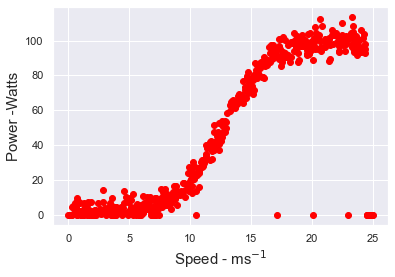

In [3]:
# X and y values for regression
X = data.iloc[:, 0].values
y = data.iloc[:, 1].values

# Plot the data in a scatterplot
def scatter_plot(X, y):
    # scatter plot of data set
    plt.scatter(X, y, color="red");
    
    # the x label of plot
    plt.xlabel("Speed - ms$^{-1}$", fontsize=15)
    
    # the y label of plot
    plt.ylabel("Power -Watts", fontsize=15)
    
    
scatter_plot(X, y)

In [4]:
print(data.describe())

            speed       power
count  500.000000  500.000000
mean    12.590398   48.014584
std      7.224991   41.614572
min      0.000000    0.000000
25%      6.324750    5.288000
50%     12.550500   41.645500
75%     18.775250   93.537000
max     25.000000  113.556000


The scatter plots shows a few outliers present in the dataset. These outliers are probably a computer malfunction or mechanical issue with the windmill.
To avoid these points from skewing our data and decreaseing it's accuracy they will be removed. While these means the 
data set is slightly smaller it gives us a more accurate set to work with.

In [5]:
# Locate data points where speed is > 10 and power is = 0
data.loc[(data['power'] == 0 ) & (data['speed'] > 10)]

,speed,power
208,10.511,0.0
340,17.167,0.0
404,20.095,0.0
456,22.998,0.0
490,24.499,0.0
491,24.525,0.0
492,24.575,0.0
493,24.650,0.0
494,24.750,0.0
495,24.775,0.0


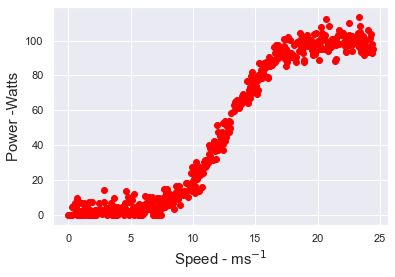

In [6]:
# New more accurate dataset to work with
data = data.drop([208, 340, 404, 456, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499]);
X = data.iloc[:, 0].values
y = data.iloc[:, 1].values
X = X.reshape(-1, 1)
scatter_plot(X, y)

# Decision Tree Regression

A Regression will be performed using the DecisionTreeRegressor. The function is a method to obtain a line
of best fit, given a dependent variable (power) and an independent variavle (speed).
The slope is determined with

$$ y=a+bx $$

This is only a line of best fit, in fact most points won't be on the line at all. To calculate the error we use

$$ error = y(real)-y(predicted) = y(real)-(a+bx) $$

For now we will be just using LinearRegresion functional call intercept_ which will to perform the slope calculation.


https://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_regression.html#sphx-glr-auto-examples-ensemble-plot-adaboost-regression-py

https://towardsdatascience.com/simple-and-multiple-linear-regression-with-python-c9ab422ec29c


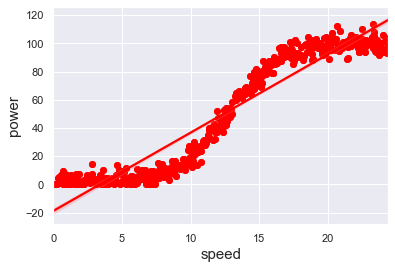

In [7]:
def reg_plot(X, y):
    plt.scatter(X, y, color="red");
    # the x label of plot
    plt.xlabel("Speed - ms$^{-1}$", fontsize=15) 
    # the y label of plot
    plt.ylabel("Power -Watts", fontsize=15)
    
    sb.regplot(x='speed',y='power',data = data, color = "red") # regplot to visualise a simple linear regression
    
reg_plot(X, y)



In [8]:
import sklearn.linear_model as lin

x = data["speed"].to_numpy()
y = data["power"].to_numpy()
x = x.reshape(-1, 1)

model = lin.LinearRegression()
model.fit(x, y)
regression = model.score(x, y)
print("Regression for this model is " , regression)

print("The slope and intercept of the line best fit is ", model.intercept_)
print("The coefficient of the model is ", model.coef_)

p = [model.intercept_, model.coef_]

def fill(x, p):
    return p[0] + x * p[1]

def linPredict(x):
    return fill(x,p)

# Linear Regression Predictions
print("Power: 10 Speed:", linPredict(10))
print("Power: 15 Speed:", linPredict(15))
print("Power: 20 Speed:", linPredict(20))
print("Power: 25 Speed:", linPredict(25))
print("Power: 30 Speed:", linPredict(30))



Regression for this model is  0.9025487607456801
The slope and intercept of the line best fit is  -18.87009060732686
The coefficient of the model is  [5.5509909]
Power: 10 Speed: [36.63981839]
Power: 15 Speed: [64.39477288]
Power: 20 Speed: [92.14972738]
Power: 25 Speed: [119.90468188]
Power: 30 Speed: [147.65963638]


# Training and Testing Data Sets

The train_test_split import from the sklearn.model_selection package randomly split up the data set into two
sepearte sets. One for training on, one for testing on. Since it is important to train with a good
spread of values it is better to randomly choose points for each data set. 

It's better to have a larger training set, this can be programmed with the test_size parameter. For this 
training I will be setting the test data set to be 20% of the total dataset

In [31]:
# decision tree regression
from sklearn.model_selection import train_test_split
# train_test_splito n dataset, test size = 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Sigmoid Activation

The activation function is treated as a middle man between the unput of the current
neuron and the output to the next one. The graph resembles a sigmoid function with a noticable "S" shaped curve.
$$ S(x) = \frac{1}{1 +e^-x} $$

Sigmoid function returns a value between 0 and 1



In [59]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Create layers for model
inputLayer = Input(shape=(None, 1))
denseLayer1 = Dense(500, activation='sigmoid')(inputLayer)
denseLayer2 = Dense(100, activation='sigmoid')(denseLayer1)
denseLayer3 = Dense(50, activation='sigmoid')(denseLayer2)
output = Dense(1)(denseLayer3)
model = Model(inputLayer, outputs=output)

regressor = DecisionTreeRegressor();
regressor.fit(X_train, y_train);


model = Model(inputs=inputLayer, outputs=output)
model.compile( optimizer="adam",loss="mean_squared_error",  metrics=["mean_squared_error"])


# Train the model for 1 epoch from Numpy data
batch_size = 64
print("Fit on NumPy data")
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=1000)

# Train the model for 1 epoch using a dataset
dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(batch_size)
print("Fit on Dataset")
history = model.fit(dataset, epochs=1)

Fit on NumPy data
Epoch 1/1000
7/7 [==============================] - 0s 2ms/step - loss: 4108.2944 - mean_squared_error: 4108.2944
Epoch 2/1000
7/7 [==============================] - 0s 2ms/step - loss: 3963.9678 - mean_squared_error: 3963.9678
Epoch 3/1000
7/7 [==============================] - 0s 1ms/step - loss: 3881.4377 - mean_squared_error: 3881.4377
Epoch 4/1000
7/7 [==============================] - 0s 2ms/step - loss: 3819.2100 - mean_squared_error: 3819.2100
Epoch 5/1000
7/7 [==============================] - 0s 2ms/step - loss: 3768.1763 - mean_squared_error: 3768.1763
Epoch 6/1000
7/7 [==============================] - 0s 2ms/step - loss: 3728.6611 - mean_squared_error: 3728.6611
Epoch 7/1000
7/7 [==============================] - 0s 2ms/step - loss: 3695.4368 - mean_squared_error: 3695.4368
Epoch 8/1000
7/7 [==============================] - 0s 2ms/step - loss: 3666.7510 - mean_squared_error: 3666.7510
Epoch 9/1000
7/7 [==============================] - 0s 2ms/step - loss

7/7 [==============================] - 0s 2ms/step - loss: 2635.0940 - mean_squared_error: 2635.0940
Epoch 73/1000
7/7 [==============================] - 0s 2ms/step - loss: 2624.4807 - mean_squared_error: 2624.4807
Epoch 74/1000
7/7 [==============================] - 0s 2ms/step - loss: 2612.8682 - mean_squared_error: 2612.8682
Epoch 75/1000
7/7 [==============================] - 0s 2ms/step - loss: 2601.8538 - mean_squared_error: 2601.8538
Epoch 76/1000
7/7 [==============================] - 0s 2ms/step - loss: 2589.8145 - mean_squared_error: 2589.8145
Epoch 77/1000
7/7 [==============================] - 0s 2ms/step - loss: 2577.8601 - mean_squared_error: 2577.8601
Epoch 78/1000
7/7 [==============================] - 0s 2ms/step - loss: 2566.4001 - mean_squared_error: 2566.4001
Epoch 79/1000
7/7 [==============================] - 0s 2ms/step - loss: 2555.4275 - mean_squared_error: 2555.4275
Epoch 80/1000
7/7 [==============================] - 0s 2ms/step - loss: 2544.5552 - mean_squa

7/7 [==============================] - 0s 2ms/step - loss: 2068.5022 - mean_squared_error: 2068.5022
Epoch 143/1000
7/7 [==============================] - 0s 2ms/step - loss: 2063.1995 - mean_squared_error: 2063.1995
Epoch 144/1000
7/7 [==============================] - 0s 2ms/step - loss: 2058.4993 - mean_squared_error: 2058.4993
Epoch 145/1000
7/7 [==============================] - 0s 2ms/step - loss: 2054.0095 - mean_squared_error: 2054.0095
Epoch 146/1000
7/7 [==============================] - 0s 1ms/step - loss: 2049.0977 - mean_squared_error: 2049.0977
Epoch 147/1000
7/7 [==============================] - 0s 2ms/step - loss: 2044.0143 - mean_squared_error: 2044.0143
Epoch 148/1000
7/7 [==============================] - 0s 2ms/step - loss: 2039.2567 - mean_squared_error: 2039.2567
Epoch 149/1000
7/7 [==============================] - 0s 1ms/step - loss: 2034.6201 - mean_squared_error: 2034.6201
Epoch 150/1000
7/7 [==============================] - 0s 2ms/step - loss: 2029.5588 - m

7/7 [==============================] - 0s 2ms/step - loss: 1832.6069 - mean_squared_error: 1832.6069
Epoch 213/1000
7/7 [==============================] - 0s 2ms/step - loss: 1830.7777 - mean_squared_error: 1830.7777
Epoch 214/1000
7/7 [==============================] - 0s 2ms/step - loss: 1828.8171 - mean_squared_error: 1828.8171
Epoch 215/1000
7/7 [==============================] - 0s 2ms/step - loss: 1826.9331 - mean_squared_error: 1826.9331
Epoch 216/1000
7/7 [==============================] - 0s 2ms/step - loss: 1825.0201 - mean_squared_error: 1825.0201
Epoch 217/1000
7/7 [==============================] - 0s 2ms/step - loss: 1823.2086 - mean_squared_error: 1823.2086
Epoch 218/1000
7/7 [==============================] - 0s 2ms/step - loss: 1821.1305 - mean_squared_error: 1821.1305
Epoch 219/1000
7/7 [==============================] - 0s 2ms/step - loss: 1819.1382 - mean_squared_error: 1819.1382
Epoch 220/1000
7/7 [==============================] - 0s 2ms/step - loss: 1817.3020 - m

7/7 [==============================] - 0s 1ms/step - loss: 1767.5569 - mean_squared_error: 1767.5569
Epoch 283/1000
7/7 [==============================] - 0s 1ms/step - loss: 1767.5170 - mean_squared_error: 1767.5170
Epoch 284/1000
7/7 [==============================] - 0s 2ms/step - loss: 1767.3143 - mean_squared_error: 1767.3143
Epoch 285/1000
7/7 [==============================] - 0s 2ms/step - loss: 1766.9238 - mean_squared_error: 1766.9238
Epoch 286/1000
7/7 [==============================] - 0s 2ms/step - loss: 1766.6954 - mean_squared_error: 1766.6954
Epoch 287/1000
7/7 [==============================] - 0s 1ms/step - loss: 1766.5444 - mean_squared_error: 1766.5444
Epoch 288/1000
7/7 [==============================] - 0s 2ms/step - loss: 1766.4076 - mean_squared_error: 1766.4076
Epoch 289/1000
7/7 [==============================] - 0s 2ms/step - loss: 1766.2194 - mean_squared_error: 1766.2194
Epoch 290/1000
7/7 [==============================] - 0s 2ms/step - loss: 1766.0215 - m

7/7 [==============================] - 0s 2ms/step - loss: 960.3282 - mean_squared_error: 960.3282
Epoch 353/1000
7/7 [==============================] - 0s 2ms/step - loss: 938.3014 - mean_squared_error: 938.3014
Epoch 354/1000
7/7 [==============================] - 0s 2ms/step - loss: 924.7676 - mean_squared_error: 924.7676
Epoch 355/1000
7/7 [==============================] - 0s 2ms/step - loss: 911.4398 - mean_squared_error: 911.4398
Epoch 356/1000
7/7 [==============================] - 0s 2ms/step - loss: 897.5963 - mean_squared_error: 897.5963
Epoch 357/1000
7/7 [==============================] - 0s 2ms/step - loss: 885.0125 - mean_squared_error: 885.0125
Epoch 358/1000
7/7 [==============================] - 0s 2ms/step - loss: 874.2585 - mean_squared_error: 874.2585
Epoch 359/1000
7/7 [==============================] - 0s 2ms/step - loss: 866.1221 - mean_squared_error: 866.1221
Epoch 360/1000
7/7 [==============================] - 0s 2ms/step - loss: 852.8246 - mean_squared_error

Epoch 424/1000
7/7 [==============================] - 0s 2ms/step - loss: 390.7575 - mean_squared_error: 390.7575
Epoch 425/1000
7/7 [==============================] - 0s 2ms/step - loss: 385.9595 - mean_squared_error: 385.9595
Epoch 426/1000
7/7 [==============================] - 0s 2ms/step - loss: 381.4575 - mean_squared_error: 381.4575
Epoch 427/1000
7/7 [==============================] - 0s 2ms/step - loss: 377.6479 - mean_squared_error: 377.6479
Epoch 428/1000
7/7 [==============================] - 0s 2ms/step - loss: 373.0145 - mean_squared_error: 373.0145
Epoch 429/1000
7/7 [==============================] - 0s 2ms/step - loss: 369.1821 - mean_squared_error: 369.1821
Epoch 430/1000
7/7 [==============================] - 0s 2ms/step - loss: 364.8936 - mean_squared_error: 364.8936
Epoch 431/1000
7/7 [==============================] - 0s 2ms/step - loss: 360.3063 - mean_squared_error: 360.3063
Epoch 432/1000
7/7 [==============================] - 0s 2ms/step - loss: 356.2714 - mea

7/7 [==============================] - 0s 2ms/step - loss: 174.2963 - mean_squared_error: 174.2963
Epoch 496/1000
7/7 [==============================] - 0s 2ms/step - loss: 172.2818 - mean_squared_error: 172.2818
Epoch 497/1000
7/7 [==============================] - 0s 2ms/step - loss: 170.0513 - mean_squared_error: 170.0513
Epoch 498/1000
7/7 [==============================] - 0s 2ms/step - loss: 168.1421 - mean_squared_error: 168.1421
Epoch 499/1000
7/7 [==============================] - 0s 1ms/step - loss: 166.1505 - mean_squared_error: 166.1505
Epoch 500/1000
7/7 [==============================] - 0s 1ms/step - loss: 164.2276 - mean_squared_error: 164.2276
Epoch 501/1000
7/7 [==============================] - 0s 1ms/step - loss: 162.3986 - mean_squared_error: 162.3986
Epoch 502/1000
7/7 [==============================] - 0s 1ms/step - loss: 161.1478 - mean_squared_error: 161.1478
Epoch 503/1000
7/7 [==============================] - 0s 1ms/step - loss: 159.7250 - mean_squared_error

7/7 [==============================] - 0s 2ms/step - loss: 77.3630 - mean_squared_error: 77.3630
Epoch 568/1000
7/7 [==============================] - 0s 2ms/step - loss: 76.2080 - mean_squared_error: 76.2080
Epoch 569/1000
7/7 [==============================] - 0s 2ms/step - loss: 74.9666 - mean_squared_error: 74.9666
Epoch 570/1000
7/7 [==============================] - 0s 2ms/step - loss: 74.1604 - mean_squared_error: 74.1604
Epoch 571/1000
7/7 [==============================] - 0s 2ms/step - loss: 73.3456 - mean_squared_error: 73.3456
Epoch 572/1000
7/7 [==============================] - 0s 2ms/step - loss: 72.4192 - mean_squared_error: 72.4192
Epoch 573/1000
7/7 [==============================] - 0s 2ms/step - loss: 71.8789 - mean_squared_error: 71.8789
Epoch 574/1000
7/7 [==============================] - 0s 2ms/step - loss: 71.2297 - mean_squared_error: 71.2297
Epoch 575/1000
7/7 [==============================] - 0s 2ms/step - loss: 70.1577 - mean_squared_error: 70.1577
Epoch 5

7/7 [==============================] - 0s 2ms/step - loss: 36.9094 - mean_squared_error: 36.9094
Epoch 641/1000
7/7 [==============================] - 0s 2ms/step - loss: 40.3088 - mean_squared_error: 40.3088
Epoch 642/1000
7/7 [==============================] - 0s 2ms/step - loss: 37.7223 - mean_squared_error: 37.7223
Epoch 643/1000
7/7 [==============================] - 0s 2ms/step - loss: 35.6666 - mean_squared_error: 35.6666
Epoch 644/1000
7/7 [==============================] - 0s 2ms/step - loss: 34.7449 - mean_squared_error: 34.7449
Epoch 645/1000
7/7 [==============================] - 0s 2ms/step - loss: 34.9203 - mean_squared_error: 34.9203
Epoch 646/1000
7/7 [==============================] - 0s 2ms/step - loss: 35.2151 - mean_squared_error: 35.2151
Epoch 647/1000
7/7 [==============================] - 0s 2ms/step - loss: 34.7265 - mean_squared_error: 34.7265
Epoch 648/1000
7/7 [==============================] - 0s 2ms/step - loss: 33.6861 - mean_squared_error: 33.6861
Epoch 6

7/7 [==============================] - 0s 2ms/step - loss: 22.1510 - mean_squared_error: 22.1510
Epoch 714/1000
7/7 [==============================] - 0s 2ms/step - loss: 22.2650 - mean_squared_error: 22.2650
Epoch 715/1000
7/7 [==============================] - 0s 2ms/step - loss: 21.5792 - mean_squared_error: 21.5792
Epoch 716/1000
7/7 [==============================] - 0s 2ms/step - loss: 21.4337 - mean_squared_error: 21.4337
Epoch 717/1000
7/7 [==============================] - 0s 2ms/step - loss: 22.4297 - mean_squared_error: 22.4297
Epoch 718/1000
7/7 [==============================] - 0s 1ms/step - loss: 22.7289 - mean_squared_error: 22.7289
Epoch 719/1000
7/7 [==============================] - 0s 1ms/step - loss: 21.8605 - mean_squared_error: 21.8605
Epoch 720/1000
7/7 [==============================] - 0s 1ms/step - loss: 21.0840 - mean_squared_error: 21.0840
Epoch 721/1000
7/7 [==============================] - 0s 1ms/step - loss: 21.3132 - mean_squared_error: 21.3132
Epoch 7

7/7 [==============================] - 0s 2ms/step - loss: 18.3159 - mean_squared_error: 18.3159
Epoch 787/1000
7/7 [==============================] - 0s 2ms/step - loss: 17.9963 - mean_squared_error: 17.9963
Epoch 788/1000
7/7 [==============================] - 0s 2ms/step - loss: 17.7997 - mean_squared_error: 17.7997
Epoch 789/1000
7/7 [==============================] - 0s 1ms/step - loss: 17.6888 - mean_squared_error: 17.6888
Epoch 790/1000
7/7 [==============================] - 0s 1ms/step - loss: 17.5895 - mean_squared_error: 17.5895
Epoch 791/1000
7/7 [==============================] - 0s 1ms/step - loss: 17.8663 - mean_squared_error: 17.8663
Epoch 792/1000
7/7 [==============================] - 0s 2ms/step - loss: 17.6302 - mean_squared_error: 17.6302
Epoch 793/1000
7/7 [==============================] - 0s 2ms/step - loss: 18.2773 - mean_squared_error: 18.2773
Epoch 794/1000
7/7 [==============================] - 0s 2ms/step - loss: 18.2053 - mean_squared_error: 18.2053
Epoch 7

7/7 [==============================] - 0s 2ms/step - loss: 16.7455 - mean_squared_error: 16.7455
Epoch 860/1000
7/7 [==============================] - 0s 2ms/step - loss: 17.0091 - mean_squared_error: 17.0091
Epoch 861/1000
7/7 [==============================] - 0s 2ms/step - loss: 16.8789 - mean_squared_error: 16.8789
Epoch 862/1000
7/7 [==============================] - 0s 2ms/step - loss: 17.4877 - mean_squared_error: 17.4877
Epoch 863/1000
7/7 [==============================] - 0s 2ms/step - loss: 17.0814 - mean_squared_error: 17.0814
Epoch 864/1000
7/7 [==============================] - 0s 2ms/step - loss: 17.9497 - mean_squared_error: 17.9497
Epoch 865/1000
7/7 [==============================] - 0s 2ms/step - loss: 18.2955 - mean_squared_error: 18.2955
Epoch 866/1000
7/7 [==============================] - 0s 2ms/step - loss: 17.6483 - mean_squared_error: 17.6483
Epoch 867/1000
7/7 [==============================] - 0s 2ms/step - loss: 17.1353 - mean_squared_error: 17.1353
Epoch 8

7/7 [==============================] - 0s 2ms/step - loss: 16.6787 - mean_squared_error: 16.6787
Epoch 932/1000
7/7 [==============================] - 0s 2ms/step - loss: 16.4818 - mean_squared_error: 16.4818
Epoch 933/1000
7/7 [==============================] - 0s 2ms/step - loss: 17.0116 - mean_squared_error: 17.0116
Epoch 934/1000
7/7 [==============================] - 0s 2ms/step - loss: 16.9007 - mean_squared_error: 16.9007
Epoch 935/1000
7/7 [==============================] - 0s 2ms/step - loss: 16.5394 - mean_squared_error: 16.5394
Epoch 936/1000
7/7 [==============================] - 0s 1ms/step - loss: 18.2559 - mean_squared_error: 18.2559
Epoch 937/1000
7/7 [==============================] - 0s 2ms/step - loss: 18.6903 - mean_squared_error: 18.6903
Epoch 938/1000
7/7 [==============================] - 0s 2ms/step - loss: 17.5424 - mean_squared_error: 17.5424
Epoch 939/1000
7/7 [==============================] - 0s 2ms/step - loss: 16.9222 - mean_squared_error: 16.9222
Epoch 9

In [ ]:
print (y_pred[5])